In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Problem: 1

# A wholesale distributor operating in different regions of Portugal has information on 
# annual spending of several items in their stores across different regions and channels. 
# The data consists of 440 large retailers’ annual spending on 6 different varieties of products 
# in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

distributorDf = pd.read_csv('Wholesale+Customers+Data.csv')
distributorDf.drop('Buyer/Spender', axis=1, inplace=True)
distributorDf.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


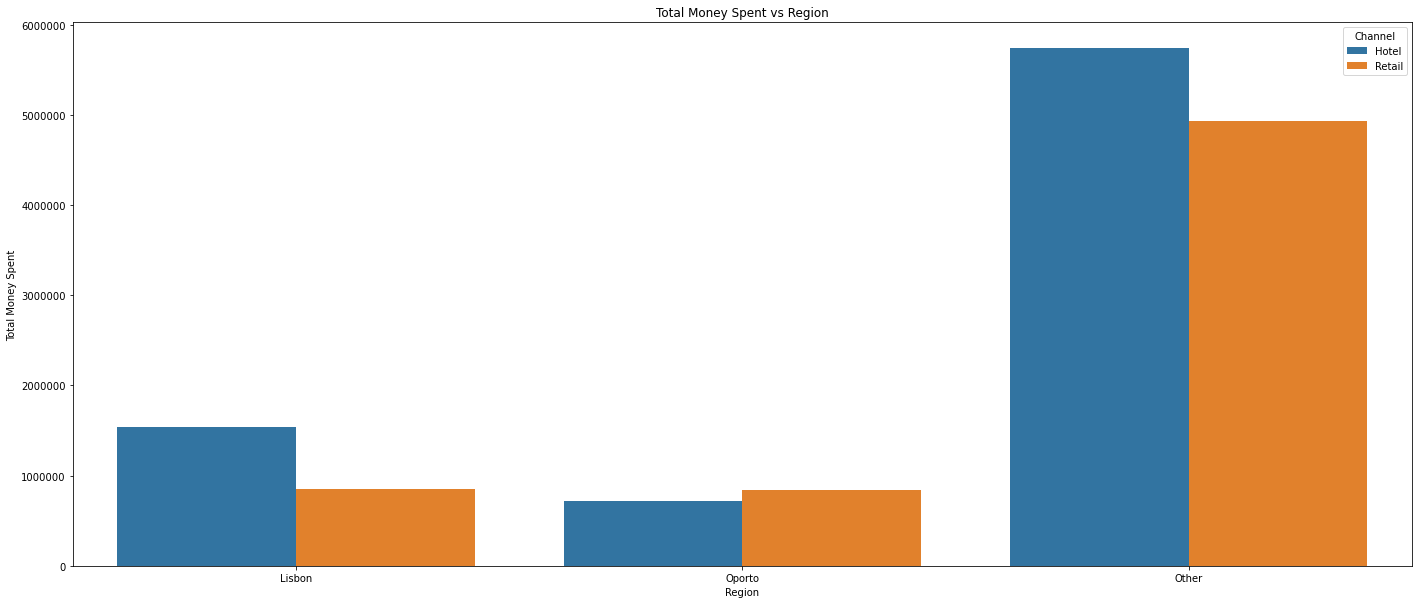

In [3]:
# 1.1 Use methods of descriptive statistics to summarize data. 
# Which Region and which Channel seems to spend more? 
# Which Region and which Channel seems to spend less?

channelGrpBy = distributorDf.groupby(['Region', 'Channel'])
sumDf = channelGrpBy.sum().reset_index()

sumDf['Total'] = sumDf['Fresh'] + sumDf['Milk'] + sumDf['Grocery'] + sumDf['Frozen'] + sumDf['Detergents_Paper'] + sumDf['Delicatessen']

plt.figure(figsize=(24,10))
sns.barplot(sumDf['Region'], sumDf['Total'], hue=sumDf['Channel'])
plt.ylabel('Total Money Spent')
plt.xlabel('Region')
plt.title('Total Money Spent vs Region')
plt.ticklabel_format(style='plain', axis='y')
plt.show()
# Customer is spending more in Region Other and for Channels Hotel & Retail
# Customer is not spending much in Region Oporto and for Channels Hotel and Retail

In [4]:
# 1.2 There are 6 different varieties of items are considered. 
# Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

lisbonHotel = distributorDf[(distributorDf['Region']=='Lisbon') & (distributorDf['Channel'] == 'Hotel')]
lisbonRetail = distributorDf[(distributorDf['Region']=='Lisbon') & (distributorDf['Channel'] == 'Retail')]

cvLisbonHotel = lisbonHotel.std()/lisbonHotel.mean()
cvLisbonRetail = lisbonRetail.std()/lisbonRetail.mean()

print('Lisbon Hotel Mean is \n{} and Lisbon Retail Mean is \n{}'.format(lisbonHotel.mean(), lisbonRetail.mean()))
print('Lisbon Hotel Std Dev is \n{} and Lisbon Retail Std Dev is \n{}'.format(lisbonHotel.std(), lisbonRetail.std()))
print('CV of lisbonHotel is \n{}'.format(cvLisbonHotel))
print('CV of lisbonRetail is \n{}'.format(cvLisbonRetail))

# Verdict:
# Data of Lisbon Hotel varies more in comparision with Lisbon Retail Channel, proving that there could be inconsistent sales
# in the Lisbon's Hotel Channel

Lisbon Hotel Mean is 
Fresh               12902.254237
Milk                 3870.203390
Grocery              4026.135593
Frozen               3127.322034
Detergents_Paper      950.525424
Delicatessen         1197.152542
dtype: float64 and Lisbon Retail Mean is 
Fresh                5200.000000
Milk                10784.000000
Grocery             18471.944444
Frozen               2584.111111
Detergents_Paper     8225.277778
Delicatessen         1871.944444
dtype: float64
Lisbon Hotel Std Dev is 
Fresh               12342.008901
Milk                 4298.321195
Grocery              3629.644143
Frozen               3276.460124
Detergents_Paper     1305.907616
Delicatessen         1219.945304
dtype: float64 and Lisbon Retail Std Dev is 
Fresh                5415.521495
Milk                 6609.221463
Grocery             10414.687844
Frozen               2424.774577
Detergents_Paper     5515.878798
Delicatessen         1626.486667
dtype: float64
CV of lisbonHotel is 
Fresh               0.

In [5]:
oportoHotel = distributorDf[(distributorDf['Region']=='Oporto') & (distributorDf['Channel'] == 'Hotel')]
oprtoRetail = distributorDf[(distributorDf['Region']=='Oporto') & (distributorDf['Channel'] == 'Retail')]
cvoportoHotel = oportoHotel.std()/oportoHotel.mean()
cvoportoRetail = oprtoRetail.std()/oprtoRetail.mean()

print('Oporto Hotel Mean is \n{} and Oporto Retail Mean is \n{}'.format(oportoHotel.mean(), oprtoRetail.mean()))
print('Oporto Hotel Std Dev is \n{} and Oporto Retail Std Dev is \n{}'.format(oportoHotel.std(), oprtoRetail.std()))
print('CV of OportoHotel is \n{}'.format(cvoportoHotel))
print('CV of OportoRetail is \n{}'.format(cvoportoRetail))

# Oporto's Hotel Channel's -> Fresh, Grocery, Detergents_Paper seem to be consistent in comparision with Oporto's Retail Channel's
# respective parameters.
# However Oporto's Retail Channels' -> Milk, Frozen and Delicatessen seem to be consistent in comparision.
# Verdict:
# This result looks like a mixed bag, making both retail and hotel channel inconsitent with the sales in the region.

Oporto Hotel Mean is 
Fresh               11650.535714
Milk                 2304.250000
Grocery              4395.500000
Frozen               5745.035714
Detergents_Paper      482.714286
Delicatessen         1105.892857
dtype: float64 and Oporto Retail Mean is 
Fresh                7289.789474
Milk                 9190.789474
Grocery             16326.315789
Frozen               1540.578947
Detergents_Paper     8410.263158
Delicatessen         1239.000000
dtype: float64
Oporto Hotel Std Dev is 
Fresh                8969.362752
Milk                 2968.628697
Grocery              3048.298815
Frozen              11454.478518
Detergents_Paper      425.310506
Delicatessen         1056.778800
dtype: float64 and Oporto Retail Std Dev is 
Fresh                6867.934548
Milk                 6611.354136
Grocery             14035.453775
Frozen               2473.266471
Detergents_Paper     8286.748255
Delicatessen         1065.438042
dtype: float64
CV of OportoHotel is 
Fresh               0.

In [6]:
otherHotel = distributorDf[(distributorDf['Region']=='Other') & (distributorDf['Channel'] == 'Hotel')]
otherRetail = distributorDf[(distributorDf['Region']=='Other') & (distributorDf['Channel'] == 'Retail')]
cvotherHotel = otherHotel.std()/otherHotel.mean()
cvotherRetail = otherRetail.std()/otherRetail.mean()

print('Other Hotel Mean is \n{} and Other Retail Mean is \n{}'.format(otherHotel.mean(), otherRetail.mean()))
print('Other Hotel Std Dev is \n{} and Other Retail Std Dev is \n{}'.format(otherHotel.std(), otherRetail.std()))
print('CV of OtherHotel is \n{}'.format(cvotherHotel))
print('CV of OtherRetail is \n{}'.format(cvotherRetail))

# Verdict:
# Other Region's Retail channel is having less variance and seemingly consistent when compared with Other region's Hotel Channel
# All varietys have significant inconsistencies in Hotel region in comparison to the Retail region

Other Hotel Mean is 
Fresh               13878.052133
Milk                 3486.981043
Grocery              3886.734597
Frozen               3656.900474
Detergents_Paper      786.682464
Delicatessen         1518.284360
dtype: float64 and Other Retail Mean is 
Fresh                9831.504762
Milk                10981.009524
Grocery             15953.809524
Frozen               1513.200000
Detergents_Paper     6899.238095
Delicatessen         1826.209524
dtype: float64
Other Hotel Std Dev is 
Fresh               14746.572913
Milk                 4508.505269
Grocery              3593.506056
Frozen               4956.590848
Detergents_Paper     1099.970640
Delicatessen         3663.183304
dtype: float64 and Other Retail Std Dev is 
Fresh                9635.394129
Milk                10574.827178
Grocery             12298.935356
Frozen               1504.498737
Detergents_Paper     6022.091110
Delicatessen         2119.052222
dtype: float64
CV of OtherHotel is 
Fresh               1.06258

In [7]:
# 1.3 On the basis of a descriptive measure of variability,
# which item shows the most inconsistent behaviour? 
# Which items show the least inconsistent behaviour?

freshStd = distributorDf['Fresh'].std()
freshMean = distributorDf['Fresh'].mean()
freshCv = freshStd/freshMean
print('Fresh StandardDev: {} & Fresh Mean: {} & Fresh Cv: {}'.format(freshStd, freshMean, freshCv))

milkStd = distributorDf['Milk'].std()
milkMean = distributorDf['Milk'].mean()
milkCv = milkStd/milkMean
print('Milk StandardDev: {} & Fresh Mean: {} & Fresh Cv: {}'.format(milkStd, milkMean, milkCv))

groceryStd = distributorDf['Grocery'].std()
groceryMean = distributorDf['Grocery'].mean()
groceryCv = groceryStd/groceryMean
print('Grocery StandardDev: {} & Grocery Mean: {} & Grocery Cv: {}'.format(groceryStd, groceryMean, groceryCv))

frozenStd = distributorDf['Frozen'].std()
frozenMean = distributorDf['Frozen'].mean()
frozenCv = frozenStd/frozenMean
print('Frozen StandardDev: {} & Frozen Mean: {} & Frozen Cv: {}'.format(frozenStd, frozenMean, frozenCv))

delicatessenStd = distributorDf['Delicatessen'].std()
delicatessenMean = distributorDf['Delicatessen'].mean()
delicatessenCv = delicatessenStd/delicatessenMean
print('Delicatessen StandardDev: {} & Delicatessen Mean: {} & Delicatessen Cv: {}'.format(delicatessenStd, delicatessenMean, delicatessenCv))

detergentStd = distributorDf['Detergents_Paper'].std()
detergentMean = distributorDf['Detergents_Paper'].mean()
detergentCv = detergentStd/detergentMean
print('Detergent StandardDev: {} & Detergent Mean: {} & Detergent Cv: {}'.format(detergentStd, detergentMean, detergentCv))


# Verdict:
# Of all the items Delicatessen item has Worst CV at 1.84 and hence making it least consistent
# Of all the items Fresh item has less CV at 1.05 hence making it most consistent

Fresh StandardDev: 12647.328865076894 & Fresh Mean: 12000.297727272728 & Fresh Cv: 1.0539179237473149
Milk StandardDev: 7380.377174570843 & Fresh Mean: 5796.265909090909 & Fresh Cv: 1.2732985840065414
Grocery StandardDev: 9503.162828994346 & Grocery Mean: 7951.277272727273 & Grocery Cv: 1.1951743730016824
Frozen StandardDev: 4854.673332592367 & Frozen Mean: 3071.931818181818 & Frozen Cv: 1.5803323836352914
Delicatessen StandardDev: 2820.1059373693975 & Delicatessen Mean: 1524.8704545454545 & Delicatessen Cv: 1.8494068981158382
Detergent StandardDev: 4767.8544479042 & Detergent Mean: 2881.4931818181817 & Detergent Cv: 1.6546471385005155


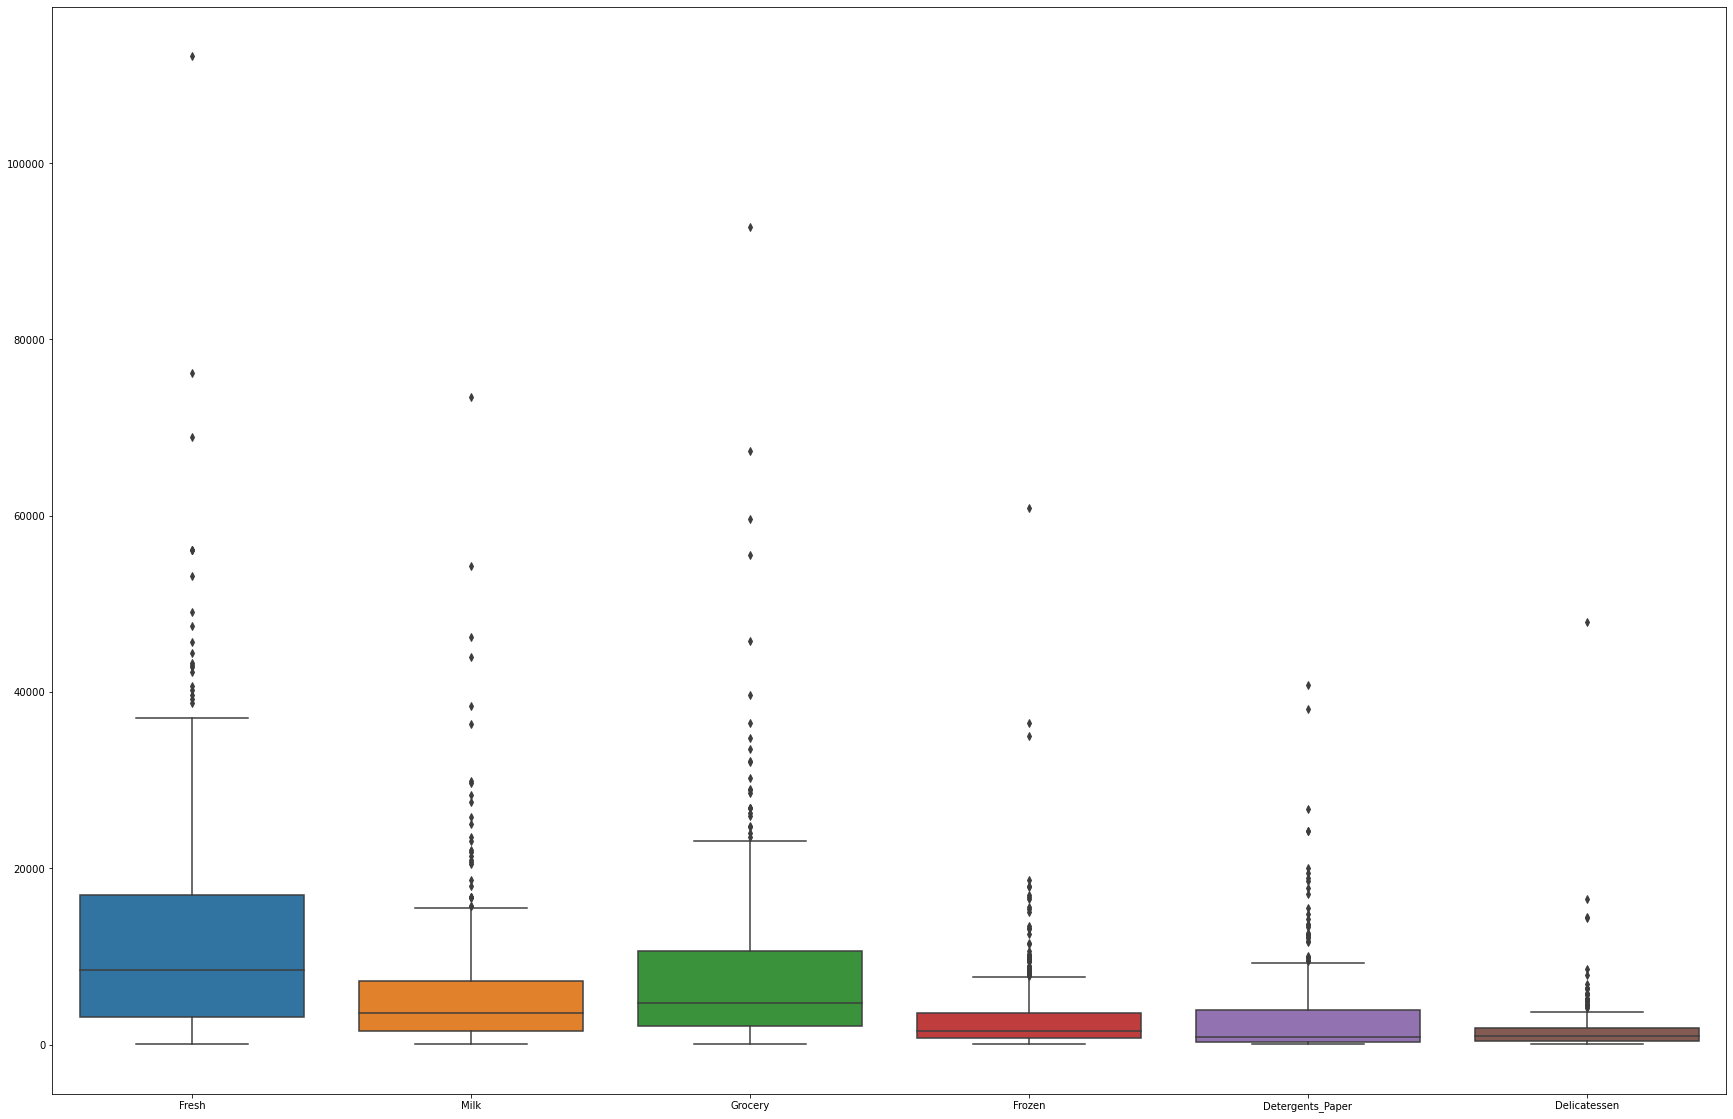

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [8]:
# 1.4 Are there any outliers in the data?
plt.figure(figsize=(30, 20))
sns.boxplot(data=distributorDf)
plt.show()

distributorDf.describe()
# Verdict:
# Yes, there are huge outliers for Fresh, Milk, Grocery & Outliers do exist for Frozen and Delicatessen as well.

In [9]:
# 1.5 On the basis of your analysis, 
# what are your recommendations for the business? 
# How can your analysis help the business to solve its problem? Answer from the business perspective

# Verdict: 

# Lisbon's Hotel Channel sales, Opportos Hotel and Retail Channel Sales, Other Region's Hotel Channel Sales need improvement, 
# they were observed to have more variance compared to their corresponding Channels. Also, Delicatessen items are not selling
# consistently and they have worst variance across all items. Out of all Fresh items seem to main a consistent sales from 
# Customer.

# Business can attract the customer attention and convert it into a sale by combining Fresh Items with Delicattesen items
# there by we can normalize the variance, smiliarly, the Opportos Hotel and Retail Channel can work together to boost sales
# as they have mutual variances low and high.

In [10]:
# Problem 2
# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students 
# that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates 

df = pd.read_csv('Survey-1.csv')

# 2.1 Construct the following contingency tables

# 2.1.1 Gender and Major
genderAndMajor = pd.crosstab(df['Gender'], df['Major'], margins=True)
genderAndMajor

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
All              7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  All  
Gender                                                          
Female           4      3                    9          0   33  
Male             6      4                    5          3   29  
All             10      7                   14          3   62

In [11]:
# 2.1.2 Gender and Grad Intention
genderAndGradIntention = pd.crosstab(df['Gender'], df['Grad Intention'], margins=True)
genderAndGradIntention

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62

In [12]:
# 2.1.3 Gender and Employment
genderAndEmployment = pd.crosstab(df['Gender'], df['Employment'], margins=True)
genderAndEmployment

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62

In [13]:
# 2.1.4. Gender and Computer
genderAndComputer = pd.crosstab(df['Gender'], df['Computer'], margins=True)
genderAndComputer

Computer  Desktop  Laptop  Tablet  All
Gender                                
Female          2      29       2   33
Male            3      26       0   29
All             5      55       2   62

In [14]:
# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

totalGenderCount = df['Gender'].count()
maleCount = totalGenderCount - df[df['Gender'] == 'Female']['Gender'].count()
print('Total Population is {} and probabiliy of selecting a male is {}%'.format(totalGenderCount, round(maleCount/totalGenderCount * 100, 2)) )

# 2.2.2. What is the probability that a randomly selected CMSU student will be female?
femaleCount = totalGenderCount - maleCount
print('Total Population is {} and probabiliy of selecting a female is {}%'.format(totalGenderCount, round(femaleCount/totalGenderCount * 100, 2)) )


Total Population is 62 and probabiliy of selecting a male is 46.77%
Total Population is 62 and probabiliy of selecting a female is 53.23%


In [15]:
# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

def getMajorCountForGender(dataFrame, major, gender):
    return dataFrame[(dataFrame['Major'] == major) & (dataFrame['Gender'] == gender)].shape[0]

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.
print('Percentage of male who chose Accounting as major is {}%'.format(round(getMajorCountForGender(df, 'Accounting', 'Male')/maleCount * 100),3))
print('Percentage of male who chose CIS as major is {}%'.format(round(getMajorCountForGender(df, 'CIS', 'Male')/maleCount * 100),3))
print('Percentage of male who chose Economics/Finance as major is {}%'.format(round(getMajorCountForGender(df, 'Economics/Finance', 'Male')/maleCount * 100),3))
print('Percentage of male who chose International Business as major is {}%'.format(round(getMajorCountForGender(df, 'International Business', 'Male')/maleCount * 100),3))
print('Percentage of male who chose Management as major is {}%'.format(round(getMajorCountForGender(df, 'Management', 'Male')/maleCount * 100),3))
print('Percentage of male who chose Other as major is {}%'.format(round(getMajorCountForGender(df, 'Other', 'Male')/maleCount * 100),3))
print('Percentage of male who chose Undecided as major is {}%'.format(round(getMajorCountForGender(df, 'Undecided', 'Male')/maleCount * 100),3))

print('\n')

# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.
print('Percentage of female who chose Accounting as major is {}%'.format(round(getMajorCountForGender(df, 'Accounting', 'Female')/femaleCount * 100),3))
print('Percentage of female who chose CIS as major is {}%'.format(round(getMajorCountForGender(df, 'CIS', 'Female')/femaleCount * 100),3))
print('Percentage of female who chose Economics/Finance as major is {}%'.format(round(getMajorCountForGender(df, 'Economics/Finance', 'Female')/femaleCount * 100),3))
print('Percentage of female who chose International Business as major is {}%'.format(round(getMajorCountForGender(df, 'International Business', 'Female')/femaleCount * 100),3))
print('Percentage of female who chose Management as major is {}%'.format(round(getMajorCountForGender(df, 'Management', 'Female')/femaleCount * 100),3))
print('Percentage of female who chose Other as major is {}%'.format(round(getMajorCountForGender(df, 'Other', 'Female')/femaleCount * 100),3))
print('Percentage of female who chose Undecided as major is {}%'.format(round(getMajorCountForGender(df, 'Undecided', 'Female')/femaleCount * 100),3))

Percentage of male who chose Accounting as major is 14%
Percentage of male who chose CIS as major is 3%
Percentage of male who chose Economics/Finance as major is 14%
Percentage of male who chose International Business as major is 7%
Percentage of male who chose Management as major is 21%
Percentage of male who chose Other as major is 14%
Percentage of male who chose Undecided as major is 10%


Percentage of female who chose Accounting as major is 9%
Percentage of female who chose CIS as major is 9%
Percentage of female who chose Economics/Finance as major is 21%
Percentage of female who chose International Business as major is 12%
Percentage of female who chose Management as major is 12%
Percentage of female who chose Other as major is 9%
Percentage of female who chose Undecided as major is 0%


In [16]:
# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
print(genderAndGradIntention, '\n')

# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
gradIntentionAndMaleCount = df[(df['Gender'] == 'Male') & (df['Grad Intention'] == 'Yes')].shape[0]
total = df.shape[0]
print('The randomly chosen student is a male and intends to graduate is {}%'.format(round(gradIntentionAndMaleCount/total * 100, 2)))

# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 
print('\n',genderAndComputer, '\n')

noLaptopAndFemaleCount = df[(df['Gender'] == 'Female') & (df['Computer'] != 'Laptop')].shape[0]
print('The randomly chosen student is a male and female and does NOT have a laptop {}%'.format(round(noLaptopAndFemaleCount/total * 100, 3)))

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62 

The randomly chosen student is a male and intends to graduate is 27.42%

 Computer  Desktop  Laptop  Tablet  All
Gender                                
Female          2      29       2   33
Male            3      26       0   29
All             5      55       2   62 

The randomly chosen student is a male and female and does NOT have a laptop 6.452%


In [17]:
# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
print(genderAndEmployment)


# 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?
total = df.shape[0]
maleOnlyCount = df[df['Gender'] == 'Male'].shape[0]
fullTimeEmployeeCount = df[df['Employment'] == 'Full-Time'].shape[0]
maleAndFullTimeEmployeeCount = df[(df['Gender'] == 'Male') & (df['Employment'] == 'Full-Time')].shape[0]

marginalProbability = round((maleOnlyCount + fullTimeEmployeeCount - maleAndFullTimeEmployeeCount)/total * 100, 2)
print('probability that a randomly chosen student is either a male or has full-time employment is {}%'.format(marginalProbability))


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, 
# she is majoring in international business or management.
print('\n', genderAndMajor)

femaleWithInternationalBusiness = df[(df['Gender'] == 'Female') & (df['Major'] == 'International Business')].shape[0]
femaleWithManagement = df[(df['Gender'] == 'Female') & (df['Major'] == 'Management')].shape[0]
totalFemales = df.shape[0]
print(femaleWithInternationalBusiness, femaleWithManagement, total)

finalProbability = round(((femaleWithInternationalBusiness/total) + (femaleWithManagement/total)) * 100 , 3)
print('Probability for female student is randomly chosen, she is majoring in international business or management is {}%'.format(finalProbability))

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62
probability that a randomly chosen student is either a male or has full-time employment is 51.61%

 Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
All              7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  All  
Gender                                                          
Female           4      3                    9          0   33  
Male             6      4                    5          3   29  
All             10      7              

In [18]:
# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). 
# The Undecided students are not considered now and the table is a 2x2 table. 
dfWithoutUndecided = df[df['Grad Intention'] != 'Undecided']
genderAndIntentToGrad = pd.crosstab(dfWithoutUndecided['Gender'], dfWithoutUndecided['Grad Intention'], margins=True)
print(genderAndIntentToGrad)

# Do you think the graduate intention and being female are independent events?
# Answer: No both are Dependent Events, ex: selected female can be a part of the graduate list, and selected 
# Graduate can be a female. p(A intersection B) != p(A) * p(B)


Grad Intention  No  Yes  All
Gender                      
Female           9   11   20
Male             3   17   20
All             12   28   40


In [19]:
# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
# Answer the following questions based on the data
# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
pd.to_numeric(df['GPA'])
gpaLessThan3 = df[df['GPA'] < 3].shape[0]
total = df.shape[0]
print('Probability of a student GPA to be less than 3 is {}%'.format(round(gpaLessThan3/total * 100,2)))


# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. 
pd.to_numeric(df['Salary'])
menWithSalaryGreater = df[(df['Gender'] == 'Male') & (df['Salary'] >= 50)].shape[0]
print('Probability that a randomly selected male earns 50 or more is {}%'.format(round((menWithSalaryGreater/ total) * 100,2)))

Probability of a student GPA to be less than 3 is 27.42%
Probability that a randomly selected male earns 50 or more is 22.58%


{'mean': 3.129032258064516, 'median': 3.1500000000000004, 'mode': 0    3.0
1    3.1
2    3.4
dtype: float64, 'oneStdDev': 72.58064516129032, 'twoStdDev': 96.7741935483871, 'threeStdDev': 100.0}
{'mean': 48.54838709677419, 'median': 50.0, 'mode': 0    40.0
dtype: float64, 'oneStdDev': 79.03225806451613, 'twoStdDev': 95.16129032258065, 'threeStdDev': 100.0}
{'mean': 482.01612903225805, 'median': 500.0, 'mode': 0    500
dtype: int64, 'oneStdDev': 80.64516129032258, 'twoStdDev': 95.16129032258065, 'threeStdDev': 98.38709677419355}
{'mean': 246.20967741935485, 'median': 200.0, 'mode': 0    300
dtype: int64, 'oneStdDev': 79.03225806451613, 'twoStdDev': 91.93548387096774, 'threeStdDev': 98.38709677419355}


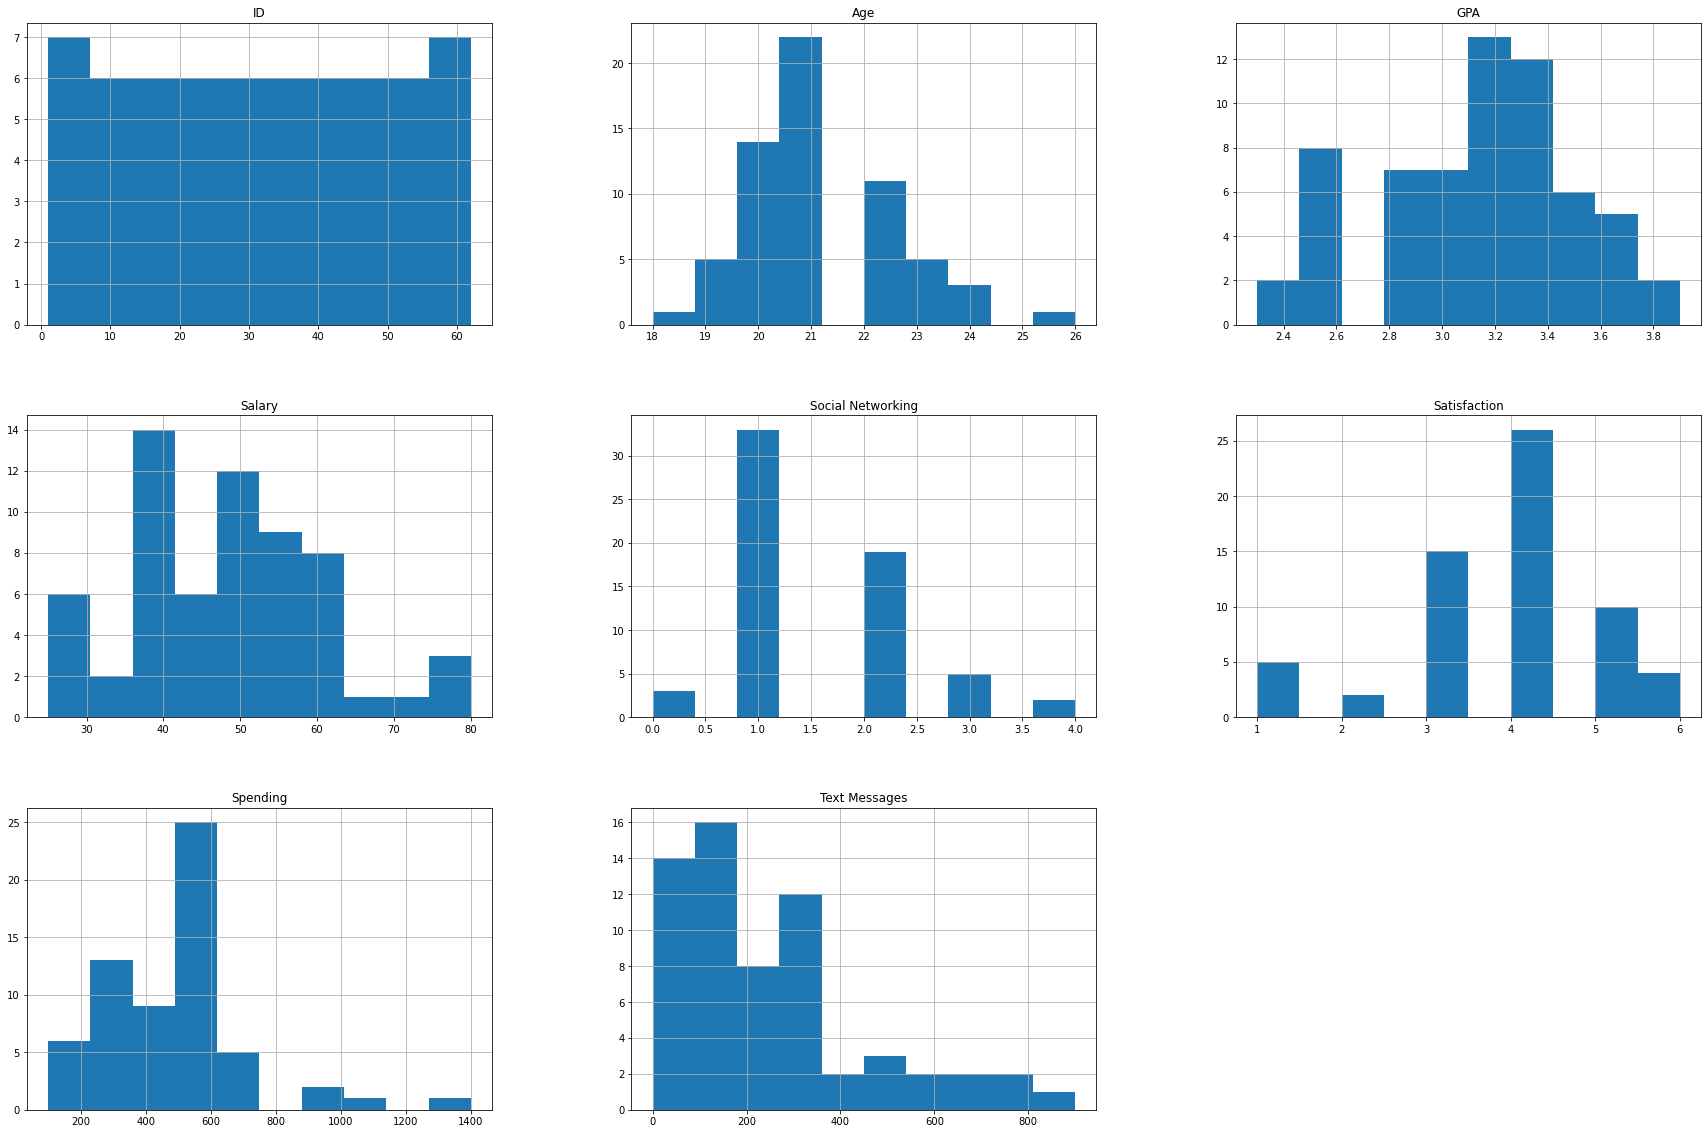

In [20]:
# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. 
# For each of them comment whether they follow a normal distribution. 
# Write a note summarizing your conclusions.

# 1) Symmetrical about its mean: Normal distribution has to follow the empirical rule i.e 68% of samples fall under (mU +/- sigma) 
# and 95% samples fall under (mU +/- 2sigma) and 99.7% samples fall under (mU +/- 3sigma)
# 2) Mean = Median = Mode


def popParameters(dframe, variable):
    mean = dframe[variable].mean()
    median = dframe[variable].median()
    mode = dframe[variable].mode()
    std = dframe[variable].std()
    
    oneStdDevPos = mean + std
    oneStdDevNeg = mean - std
    oneStdDev = dframe[(dframe[variable] >= oneStdDevNeg) & (dframe[variable] <= oneStdDevPos)]
    oneStdDevPercentage = (oneStdDev.shape[0]/dframe[variable].shape[0]) * 100

    twoStdDevPos = mean + 2 * std
    twoStdDevNeg = mean - 2 * std
    twoStdDev = dframe[(dframe[variable] >= twoStdDevNeg) & (dframe[variable] <= twoStdDevPos)]
    twoStdDevPercentage = (twoStdDev.shape[0]/dframe[variable].shape[0]) * 100
    
    threeStdDevPos = mean + 3 * std
    threeStdDevNeg = mean - 3 * std
    threeStdDev = dframe[(dframe[variable] >= threeStdDevNeg) & (dframe[variable] <= threeStdDevPos)]
    threeStdDevPercentage = (threeStdDev.shape[0]/dframe[variable].shape[0]) * 100
    
    
    return {'mean': mean, 
            'median': median, 
            'mode': mode, 
            'oneStdDev': oneStdDevPercentage, 
            'twoStdDev': twoStdDevPercentage,
            'threeStdDev': threeStdDevPercentage
           }

print(popParameters(df, 'GPA'))
# Mean, Median and Mode are placed near, hence suggesting a normal distribution
# GPA is symmetrically placed from mean with 1, 2 and 3 std dev from mean are in the range of Normal Distribution Values

print(popParameters(df, 'Salary'))
# Mean, Median and Mode are distant and hence it suggests it's not a normal distribution
# With 80% data in 1 std dev, the bell curve will be spread to left and right, instead of it's 68% range.

print(popParameters(df, 'Spending'))
# Mean, Median and mode are not identical and the distribution is not a proper bell curve

print(popParameters(df, 'Text Messages'))
# Mean, Median and mode are not identical and the distribution is not a proper bell curve

# Histogram, explaining the bell curve for age, gpa, salary, spending and text messages, majority are left skewed.
df.hist(figsize=(30, 20))
plt.show()

In [21]:
# Problem 3

# An important quality characteristic used by the manufacturers of ABC asphalt shingles is 
# the amount of moisture the shingles contain when they are packaged. 
# Customers may feel that they have purchased a product lacking in quality 
# if they find moisture and wet shingles inside the packaging.   
# In some cases, excessive moisture can cause the granules attached to the shingles for texture 
# and colouring purposes to fall off the shingles resulting in appearance problems. 
# To monitor the amount of moisture present, the company conducts moisture tests. 
# A shingle is weighed and then dried. The shingle is then reweighed, 
# and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. 
# The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

# The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

df = pd.read_csv('A+&+B+shingles.csv')


In [22]:
# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? 
# State your conclusions clearly showing all steps.

import scipy.stats as stats

# Performing the test for A
# H0: Mean moisture A's content will be <=0.35 against HA: Mean moisture A's content will be > 0.35

mU = 0.35
alpha = 0.05
t_statistic, p_value_2sided = stats.ttest_1samp(df['A'], popmean=mU)
pValue = p_value_2sided/2

if(pValue < alpha):
    print('Null hypothesis is rejected and Mean moisture for A will be > 0.35')
else:
    print('We fail to reject null hypothesis for A as p_value is {} and Mean moisture for A will be <= 0.35'.format(pValue))
    

# Performing the test for B
# H0: Mean moisture B's content will be <=0.35 against HA: Mean moisture B's content will be > 0.35

mU = 0.35
alpha = 0.05
t_statistic, p_value_2sided = stats.ttest_1samp(df['B'], popmean=mU, nan_policy='omit')
pValue = p_value_2sided/2

if(pValue < alpha):
    print('Null hypothesis for B is rejected & Mean moisture for B will be > 0.35')
else:
    print('We fail to reject null hypothesis for B as p_value is {}'.format(pValue))
    print('Mean moisture for B will be <= 0.35')
    


# 3.2 Do you think that the population mean for shingles A and B are equal? 
# Form the hypothesis and conduct the test of the hypothesis. 

# H0: Mean moisture content will be <=0.35 against HA: Mean moisture content will be > 0.35

aMean = df['A'].mean()
bMean = df['B'].mean()
t_statistic, p_value_2sided = stats.ttest_ind(df['A'], df['B'], nan_policy='omit')
                                                 
alpha = 0.05
pValue = p_value_2sided/2
                                                 
if(pValue < alpha):
    print('Null hypothesis is rejected')
else:
    print('We fail to reject null hypothesis as p_value is {} At 95% confidence interval, we can say that the mean moisture content will be less than or equal to 0.35'.format(pValue))

# What assumption do you need to check before the test for equality of means is performed?

# Assumptions to perform a valid 2-sample T Test:
# 1. Sample data of the series should be independent. i.e one observation should not affect other.
# 2. Sample data values of each series are continuos.
# 3. Sample data in each series should be a random sample from the population.
# 4. Variances (sigma^2) has to be equal for the 2 series i.e sigma1^2 - sigma2^2 = 0.
# 5. Sample data in each series is normally distributed.



We fail to reject null hypothesis for A as p_value is 0.07477633144907513 and Mean moisture for A will be <= 0.35
Null hypothesis for B is rejected & Mean moisture for B will be > 0.35
We fail to reject null hypothesis as p_value is 0.1008748285917653 At 95% confidence interval, we can say that the mean moisture content will be less than or equal to 0.35
